In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)


In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)


In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
x= df.drop(columns=['Exited'])
y = df['Exited'].values


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [ ]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

In [ ]:
x_train_t= s.fit_transform(x_train)
x_test_t = s.transform(x_test)

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
m= Sequential()


In [ ]:
m.add(Dense(11,activation='sigmoid',input_dim=11))
m.add(Dense(11,activation='sigmoid'))
m.add(Dense(1,activation='sigmoid'))

In [ ]:
m.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
 dense_3 (Dense)             (None, 11)                22        
                                                                 
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 1)                 12        
                                                                 
Total params: 442 (1.73 KB)
Trainable params: 442 (1.7

In [ ]:
m.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = m.fit(x_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 2s 8ms/step - loss: 0.5220 - accuracy: 0.7958 - val_loss: 0.5047 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 1s 5ms/step - loss: 0.5063 - accuracy: 0.7958 - val_loss: 0.5047 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 1s 4ms/step - loss: 0.5063 - accuracy: 0.7958 - val_loss: 0.5047 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 1s 4ms/step - loss: 0.5065 - accuracy: 0.7958 - val_loss: 0.5046 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 1s 4ms/step - loss: 0.5062 - accuracy: 0.7958 - val_loss: 0.5047 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 0s 4ms/step - loss: 0.5059 - accuracy: 0.7958 - val_loss: 0.5043 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 1s 4ms/step - loss: 0.5059 - accuracy: 0.7958 - val_loss: 0.5037 - val_accuracy: 0.7969

In [ ]:
y_pred = m.predict(x_test)

63/63 [==============================] - 0s 1ms/step


In [ ]:
y_pred

array([[0.22960536],
       [0.22935939],
       [0.23032437],
       ...,
       [0.23032437],
       [0.23030356],
       [0.22960536]], dtype=float32)

In [ ]:
y_pred = y_pred.argmax(axis=-1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

In [ ]:
import matplotlib.pyplot as plt


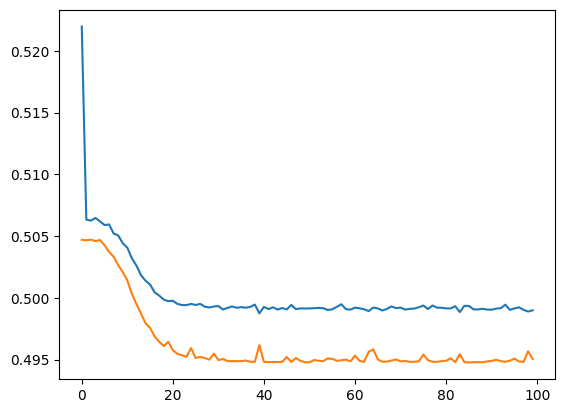

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

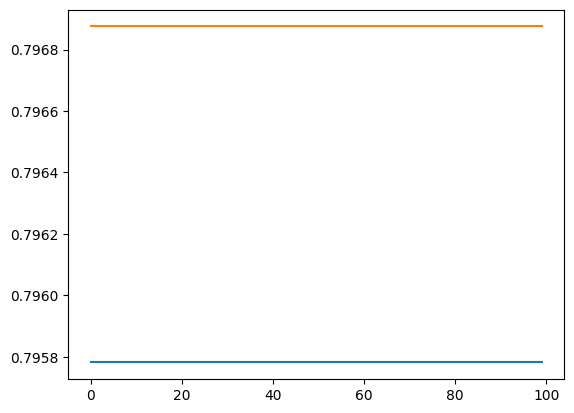

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])